In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from collections import defaultdict

from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


In [2]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [3]:
df = pd.read_csv("/Users/matteoppa/Desktop/fma_metadata/df_to_work1.csv")

In [4]:
column2drop= ["Unnamed: 0"]

In [5]:
df.drop(column2drop, inplace=True, axis=1)

In [6]:
df['liked_bin'] = np.nan
for i in range(0,len(df)):
    if df['liked'][i] == 0 or df['liked'][i] == 1:
        df['liked_bin'][i] = 0  #34 
    else:
        df['liked_bin'][i] = 1 #012

<ipython-input-6-25649067ecc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['liked_bin'][i] = 0  #34
<ipython-input-6-25649067ecc7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['liked_bin'][i] = 1 #012


In [7]:
column2drop1= ["liked"]
df.drop(column2drop1, inplace=True, axis=1)

In [8]:
class_name = 'liked_bin'

In [9]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,random_state=100, stratify=y)

In [10]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [10]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [26]:
clf_gaus = GaussianNB()
clf_gaus.fit(X_resampled, y_resampled)
y_pred = clf_gaus.predict(X_val)
y_pred0=y_pred
y_score=clf_gaus.predict_proba(X_val)

print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.9625932010615443
F1-score [0.97976944 0.75223214]
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     22251
         1.0       0.64      0.91      0.75      1488

    accuracy                           0.96     23739
   macro avg       0.82      0.94      0.87     23739
weighted avg       0.97      0.96      0.97     23739



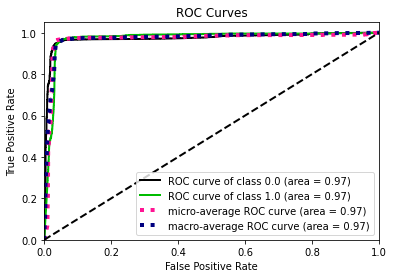

In [27]:
plot_roc(y_val, y_score)
plt.show()

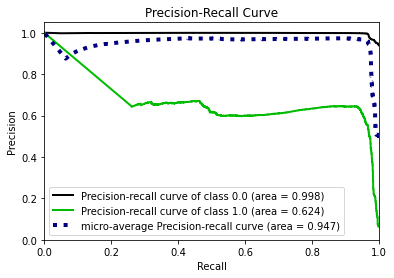

In [28]:
plot_precision_recall(y_val, y_score)
plt.show()

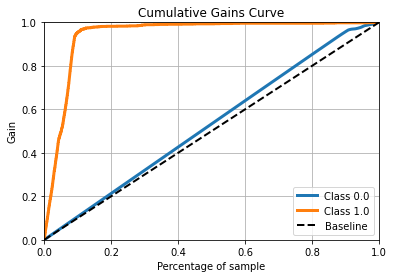

In [29]:
plot_cumulative_gain(y_val, y_score)
plt.show()

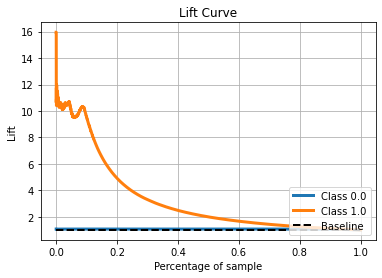

In [30]:
plot_lift_curve(y_val, y_score)
plt.show()

# CATEGORICAL NB

In [31]:
clf_cat = CategoricalNB()
clf_cat.fit(X_resampled, y_resampled)

CategoricalNB()

In [32]:
y_pred = clf_cat.predict(X_val)
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 1.0
F1-score [1. 1.]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22251
         1.0       1.00      1.00      1.00      1488

    accuracy                           1.00     23739
   macro avg       1.00      1.00      1.00     23739
weighted avg       1.00      1.00      1.00     23739



In [33]:
y_score=clf_cat.predict_proba(X_val)

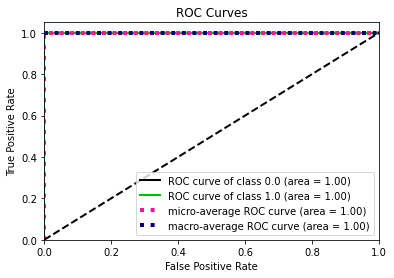

In [34]:
plot_roc(y_val, y_score)
plt.show()

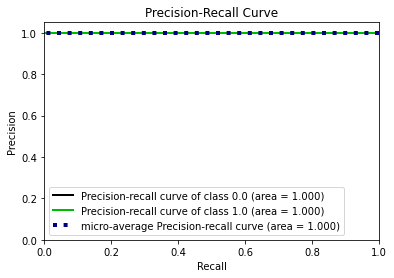

In [35]:
plot_precision_recall(y_val, y_score)
plt.show()

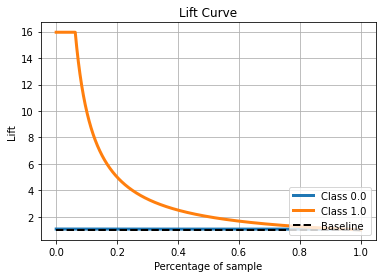

In [36]:
plot_lift_curve(y_val, y_score)
plt.show()

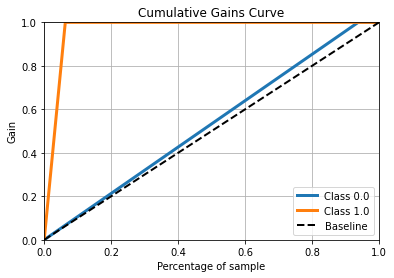

In [37]:
plot_cumulative_gain(y_val, y_score)
plt.show()

# BERNOULLI NB

In [38]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_val)
y_pred2 =y_pred
y_score=clf.predict_proba(X_val)

print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.5981717848266566
F1-score [0.73107609 0.20554676]
              precision    recall  f1-score   support

         0.0       0.98      0.58      0.73     22251
         1.0       0.12      0.83      0.21      1488

    accuracy                           0.60     23739
   macro avg       0.55      0.71      0.47     23739
weighted avg       0.93      0.60      0.70     23739



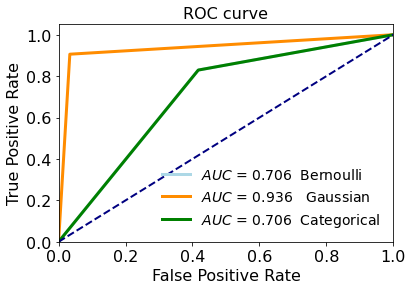

In [39]:
fpr0, tpr0, _ = roc_curve(y_val, y_pred0)
roc_auc0 = auc(fpr0, tpr0)

fpr1, tpr1, _ = roc_curve(y_val, y_pred)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_val, y_pred2)
roc_auc2 = auc(fpr2, tpr2)


plt.plot(fpr2, tpr2, color='lightblue', lw=3, label='$AUC$ = %.3f  Bernoulli' % (roc_auc2))
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC$ = %.3f   Gaussian' % (roc_auc0))
plt.plot(fpr1, tpr1, color='green', lw=3, label='$AUC$ = %.3f  Categorical' % (roc_auc1))


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# LOGISTIC REGRESSION

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [16]:
clf_log = LogisticRegression(C=100)
clf_log.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100)

In [17]:
y_pred = clf_log.predict(X_val)

print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.9489026496482581
F1-score [0.97324953 0.43131739]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     22251
         1.0       0.71      0.31      0.43      1488

    accuracy                           0.95     23739
   macro avg       0.83      0.65      0.70     23739
weighted avg       0.94      0.95      0.94     23739



In [34]:
y_score=clf_log.predict_proba(X_val)

In [28]:
from scipy.special import expit
import matplotlib.pyplot as plt
import numpy as np

In [30]:
loss = (expit(sorted(X_val) * clf_log.coef_.any()+ clf_log.intercept_.ravel())

plt.plot(sorted(X_val), loss, color='red', linewidth=3)
plt.scatter(X_resampled, y_resampled)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('liked', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

SyntaxError: invalid syntax (<ipython-input-30-8783234ab0e7>, line 3)

In [43]:
print(clf_log.coef_)
print(clf_log.intercept_)

[[ 4.89510494e-03  1.31805976e-01  2.24068647e-01  4.77181916e-02
  -1.15119464e-02 -5.42150133e-02 -8.67127902e-05 -3.73953564e-03
  -7.67367041e-02 -1.69111570e-02  1.45598670e-04 -4.53337697e-02
  -3.19153634e-02 -1.65195726e-02 -4.04064890e-02  8.88221690e-02
   2.18124882e+00]]
[-4.46108612]


In [44]:
x = 1
print('Log-odds of liked_bin', clf_log.coef_[0][0] * x + clf_log.intercept_[0])
print('Odds of like_bin', np.e**(clf_log.coef_[0][0] * x + clf_log.intercept_[0]))

Log-odds of liked_bin -4.456191015137659
Odds of like_bin 0.01160648813629574


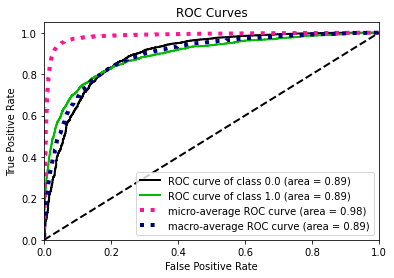

In [35]:
plot_roc(y_val, y_score)
plt.show()

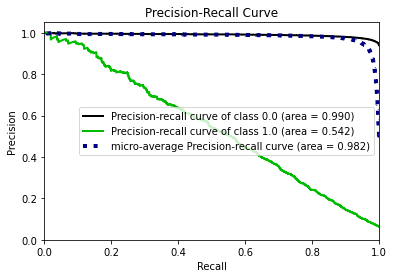

In [37]:
plot_precision_recall(y_val, y_score)
plt.show()

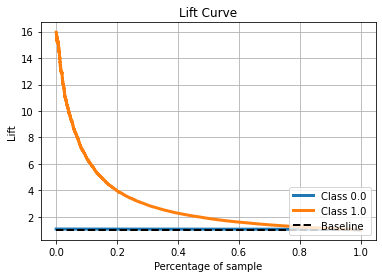

In [39]:
plot_lift_curve(y_val, y_score)
plt.show()

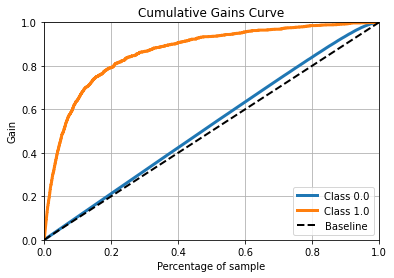

In [40]:
plot_cumulative_gain(y_val, y_score)
plt.show()